In [34]:
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras import layers
normalize = True
expert_rule = True

In [35]:
df = load_all_psd()
X = df.drop('label',axis=1)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,stratify=y)
y_test = pd.Categorical(y_test).codes
y_train = pd.Categorical(y_train).codes

In [36]:
if normalize:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [37]:
X_train = X_train.reshape(-1,41,1)

In [44]:
model = keras.Sequential()
model.add(keras.Input(shape=(41, 1)))
model.add(layers.Conv1D(filters=32,kernel_size=3,strides=2, activation="relu", padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="softmax"))
model.add(layers.Dense(3, activation="softmax"))

In [45]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy()
    )
model.fit(X_train,tf.one_hot(y_train,3),epochs=1)

6910/6910 [==============================] - 11s 2ms/step - loss: 0.4737


1728/1728 [==============================] - 1s 557us/step
precision:  0.6717687668736788
recall:  0.6244948072525731
f1:  0.6430820580550693


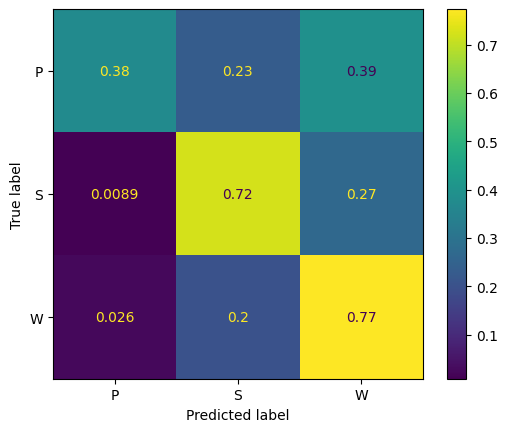

In [46]:
y_pred = np.argmax(model.predict(X_test),axis=1)
if expert_rule:
    for i in range(len(y_pred)-2):
        if y_pred[i] == y_pred[i+2]:
            y_pred[i+1] = y_pred[i]
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,normalize='true'),display_labels=['P','S','W'])
cm.plot()
precision = precision_score(y_pred=y_pred,y_true=y_test,average='macro')
recall = recall_score(y_pred=y_pred,y_true=y_test,average='macro')
f1 = f1_score(y_pred=y_pred,y_true=y_test,average='macro')
print('precision: ',precision)
print('recall: ',recall)
print('f1: ',f1)

In [41]:
import plotly.express as px
fig = px.line(pd.DataFrame([y_test,y_pred]).T)
fig.show(renderer='browser')